**PROYECTO ANALISIS DE DATOS**

**EDA ANALISIS EXPLORATIO DE DATOS **

Una vez trabajado el proceso de ETL donde se logró un archivo mejorado en sus datos, se procede a analizar estos datos usando diferentes herramientas de visualización como MATPLOTLIB y SEABORN. 
Este análisis permite determinar la mejor manera de manipular la fuente de datos para obtener respuestas a los problemas planteados, como descubir patrones, detectar anomalías o poner a prueba una hipótesis. 
Con lo anterior se logra una mejor comprensión de las variables del dataset y la relación entres esas variables. 
Con este análisis se podría garantizar que los resultados proporcionados sean válidos a los obsjetivos del negocio deseado.


** CONTEXTO**

El contexto de este análisis se centra en las Estadísticas de Argentina de acuerdo al Sistema Nacional de información  donde informan que entre los años 2018 y 2022 se registraron 19630 muertes en siniestros viales o también se puede decir que 11 personas por día como víctimas fatales por accidente de tránsito.

OBJETIVO: Encontrar medidas para disminuir la cantidad de victimas fatales de los siniestros viales

LIBRERIAS USADAS EN EL PROYECTO

In [68]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Se carga el archivo llamado viales en un dataframe de pandas
df= pd.read_csv("../datasets/viales.csv")

In [6]:
# de usa la función info para observar como se compone el dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   717 non-null    object 
 1   ROL                  717 non-null    object 
 2   SEXO                 717 non-null    object 
 3   EDAD                 717 non-null    int64  
 4   FECHA FALLECIMIENTO  648 non-null    object 
 5   NUM VICTIMAS         717 non-null    int64  
 6   FECHA                702 non-null    object 
 7   AÑO                  702 non-null    float64
 8   MES                  702 non-null    float64
 9   DIA                  702 non-null    float64
 10  HORA DET             701 non-null    object 
 11  HORA                 701 non-null    float64
 12  LUGAR                702 non-null    object 
 13  TIPO CALLE           702 non-null    object 
 14  CALLE                702 non-null    object 
 15  CRUCE                540 non-null    obj

Se observa que el dataset cuenta con 717 registros y un total de 24 columnas. este archivo fue el resultado
de unir los archivos originales de Hechos y victimas.
Ahora con la fución Head(), de obtiene información de los primeros resgistros y columnas:

In [61]:
df.head()

,ID,ROL,SEXO,EDAD,FECHA FALLECIMIENTO,NUM VICTIMAS,FECHA,AÑO,MES,DIA,...,CALLE,CRUCE,DIRECCION,COMUNA,POS X,POS Y,VICTIMA,ACUSADO,COORD X,COORD Y
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,1,2016-01-01,2016.0,1.0,1.0,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,-58.475340,-34.687570,MOTO,AUTO,98896.782384,93532.434378
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,1,2016-01-02,2016.0,1.0,2.0,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,-58.508775,-34.669777,AUTO,PASAJEROS,95832.055711,95505.416420
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03,1,2016-01-03,2016.0,1.0,3.0,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1.0,-58.390403,-34.631894,MOTO,AUTO,106684.290900,99706.576878
3,2016-0004,CONDUCTOR,MASCULINO,18,NaN,1,2016-01-10,2016.0,1.0,10.0,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,-58.465039,-34.680930,MOTO,NaN,99840.652248,94269.165344
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01,1,2016-01-21,2016.0,1.0,21.0,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,-58.387183,-34.622466,MOTO,PASAJEROS,106980.328279,100752.169158


C:\Users\jupai\AppData\Local\Temp\ipykernel_11772\3974423871.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\jupai\AppData\Local\Temp\ipykernel_11772\3974423871.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\jupai\AppData\Local\Temp\ipykernel_11772\3974423871.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\jupai\AppData\Local\Temp\ipykernel_11772\3974423871.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get

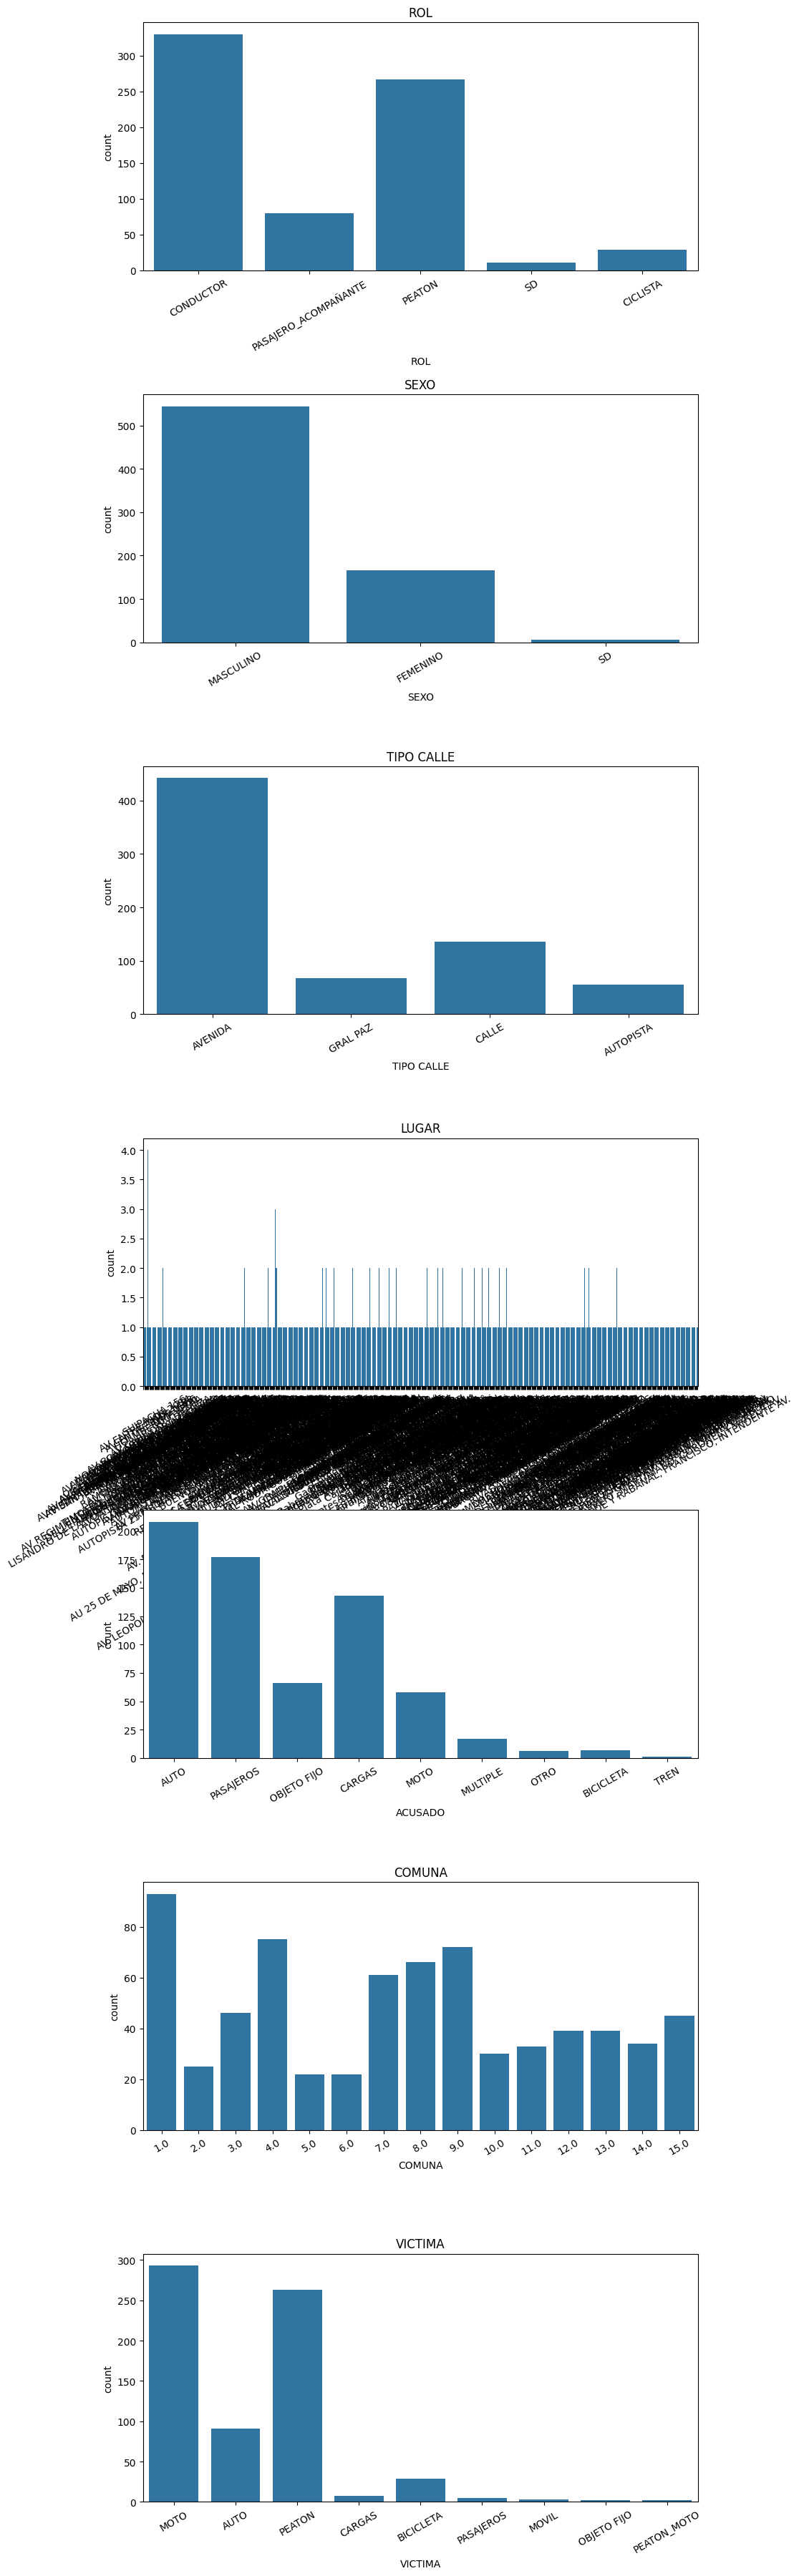

In [64]:
#  para iniciar se usan primero las siguientes variables categóricas y se genera gráficos de barras
#  y se observa su comportamiento:

col_cat = ['ROL', 'SEXO', 'TIPO CALLE', 'LUGAR', 'ACUSADO', 'COMUNA', 'VICTIMA']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Grafica del Rol: en esta gráfica se observa que en la mayoría de siniestros viales, el rol de CONDUCTOR (+300) supera a los demás. Es seguido por PEATON (+250), Pasajero acompañante (+80) y de último lugar esta el ciclista  (+30). Con lo anterior se puede inferir que se debe enfocar todos los esfuerzos de educación vial al conductor del vehículo (auto o moto) ya que pueden ser varios los motivos del accidente, como, distracción, alta velocidad, perdida de control, no uso del cinturon de sguridad. en segundo lugar esta el peaton, donde aplica tambien 
incrementar la educacion vial a peatones y no incrementar la confianza en las calles.

Gáfica por Sexo: se observa que la mayoría víctimas fatales son los hombres, superando a las mujeres en más de un 30%. Con lo anterior se confirma que los hombres son los que coducen en su mayoría  el vehículo accidentado. la campaña de prevnción de accidentes debe ir enfocado a los hombres conductores y verificar que su licencia de tránsito este conforme a la ley, ajustado la exigencia en su expedición.

Gráfica por tipo de calle: considerando que una autopista no tiene semaforos, y la avenida si los tiene, puede decirse que el hecho de que el resultado indique que la avenida es la principal escenario de accidentes viales, las intercecciones son definitamente un foco de accidentes viales. La avenida (+450)  supera en 33% a los accidentes en la calle (+150). la diferencia de avenida con calle es principalmente que la avenida tiene doble sentido, mientras que la calle solo tiene un sentido. Con base en lo anterior, la campaña de prevención de accidentes viales debe enfocarse en que las avenidas tengan bien definido las señales de tránsito en ambos sentidos, y reforzar los limites de velocidad en las intersecciones o semáforos. 

Gráfica por lugar: esta gráfica no proporciona información relevante para el análisis.

Gráfica por acusado: si tomamos los tres indices mayores segun la gráfica, se encuentra que lo lidera el item AUTO, seguido por PASAJEROS y por último CARGA. Esto quiere decir que los causantes principales de los accidentes viales son los vehiculos que colisionan con otros vehículos por diferentes causas. Luego, aparece el item Pasajeros, donde se interpreta que son peronas que usan el transporte público y ocasionan el accidente al subir o bajar de este vehículo. En este punto, cabe mencionar que las campañas deben estar enfocadas en lograr que los buses de servicio público realicen las paradas en los sitios autorizados par esta actividad, de esta manera los pasajeros no podrán caudar más accidentes. Ta,bién se puede lograr más concientización en las peronas acerca de estos accidentes viales. Por último esta el item de vehículos de carga, donde se interpreta que este tipo de vehículos son causantes de gran numeros de accidentes y puede deberse al mal estado mecánico y falta de mantenimiento preventivo y correctivo de estos. La campaña debe estar orientada a exigir que todos los vehoculos de carga cumplan con las normas técnicas de mantenimiento y emision de gases normativos. 

Gráfica por comuna: en esta gráfica se puede observar que son 15 comunas, donde la que tiene más cantidad de accidentes viales en la comuna 1, seguido por la comuna 4 y 9. La comuna que menos accidentes tienen son las comunas 5, 6 y 2. Se puede entrar a analizar la forma como esta operando estas comunas para obtener puntos donde corregir para prevenir accidentes viales, como son: estado de vias primarias, secundarias, señalización, semáforos, estrato social, inversión infraestructura, desarrollo económico.

Gráfica por victima: se observa en la gráfica que el mayor número de victimas por accidentes se da en MOTO, con aprox 290 victimas, seguido de PEATON   con 260 aprox, y luego por Auto con aprox 90  casos. Esto quiere decir que la myoría de las victimas van conduciendo motos cuando ocurre el accidente vial. la campaña se debe enfocar en los conductores de motos, quienes deben revisar la velocidad con que viajan en las calles y avenidas, asi como el estado mecanico de la moto y los documentos en regla. Luego, tambien se debe enfatizar en las victimas por peatón, donde deben existir adecuada señalización y espacio para estos actores viales, como andenes, puentes, semaforos, cebras, parques, espacios sociales, zonas verdes, etc.


Se usa el siguiente grafico de barras para comprobar las cantidades de las victimas relacionadas anteriormente:

C:\Users\jupai\AppData\Local\Temp\ipykernel_11772\1794349082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x='VICTIMA', palette="winter")


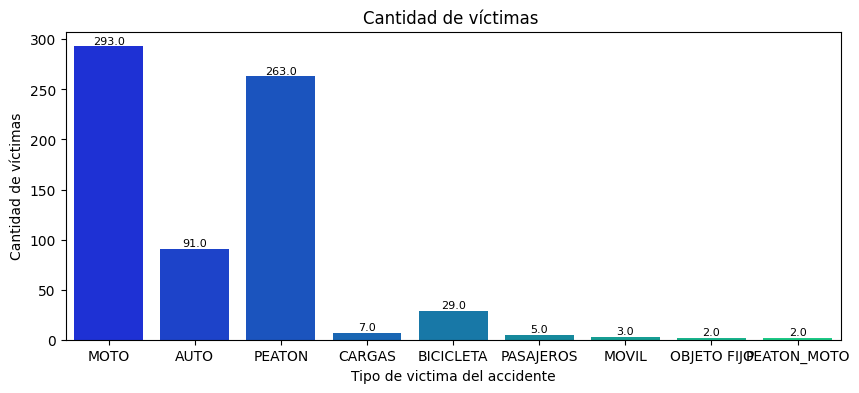

In [69]:

plt.figure(figsize=(10, 4))
ax=sns.countplot(df, x='VICTIMA', palette="winter")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.xlabel('Tipo de victima del accidente')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas ')

plt.show()

COMPORTAMIENTO DE VARIABLES NUMERICAS

Se utiliza un histograma para la relación de edad y numeros de victimas:

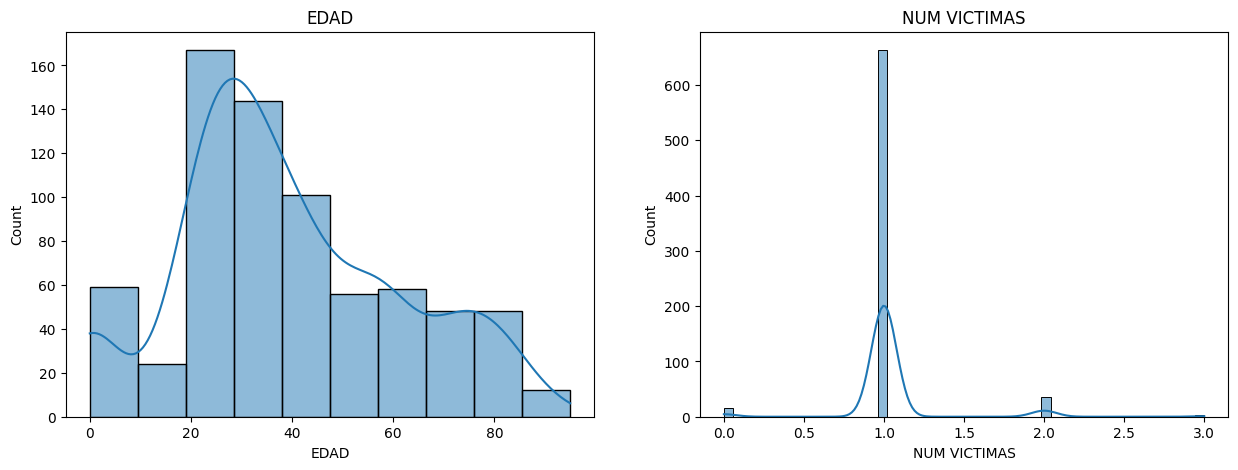

In [13]:

col_num = ['EDAD', 'NUM VICTIMAS' ]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'EDAD':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

Según las gráficas anteriores, la edad donde ocurren la mayor cantidad de accidentes viales es en el rango de 20 a 40 años con un pico maximo a los 30 años aprox. esto quiere decir que las campañas de prevención deen enfocarse tambieón en este tipo de personas, quienes son jóvenes con un trabajo y familia, brindando espacios para concientizar la seguridad vial por el cuidado propio y de la familia. Adicioanl, el la otra gráfica se cofirma que cada accidente tiene en su mayoría absoluta solo una victima. 

Histograma: Grafica por año y por comuna:

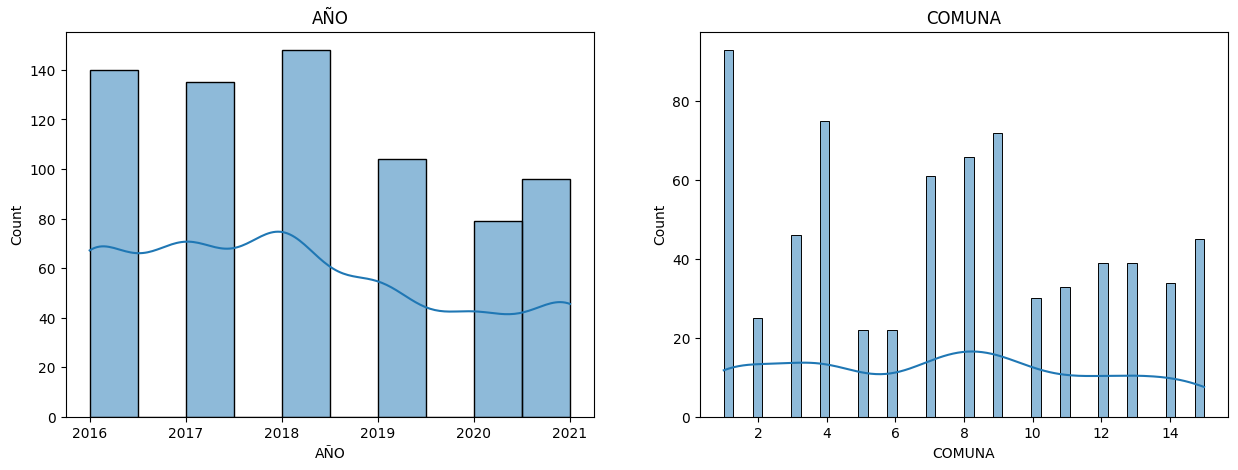

In [12]:
col_num2 = [ 'AÑO',  'COMUNA' ]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num2):
    if col == 'AÑO':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

según las graficas anteriores, se observa que desde el año 2016 hasta el 2021 ha ocurrido una disminución de la cantidad de accidentes viales fatales, excepto un incremento leve en el 2018. Esto quiere decir que a partir del año 2019 hay un decrecimiento de las victimas faales por siniestros, donde se debe entrar a avaluar qeu tipo de planes de acció ocurrieron en estos periodos, tanto nacionales como municipales. Hya que tener en cuenta que la pandemia en el 2020 puede afectar notablemente esta estadística final.
Con respecto a la comuna se observa que la numero 1 lidera la cantidad de victimas fatales en accidentes.

ANALISIS POR CANTIDAD DE VICTIMAS Y AÑO

In [36]:
 # Se agrupa por año y mes, y se suma el número de víctimas
vic = df.groupby(['AÑO', 'MES'])['NUM VICTIMAS'].sum().reset_index()

In [37]:
vic

,AÑO,MES,NUM VICTIMAS
0,2016.0,1.0,8
1,2016.0,2.0,12
2,2016.0,3.0,15
3,2016.0,4.0,9
4,2016.0,5.0,7
...,...,...,...
67,2021.0,8.0,9
68,2021.0,9.0,4
69,2021.0,10.0,5
70,2021.0,11.0,8


In [38]:
# se transforman los datos a tipo int
vic["AÑO"]= vic["AÑO"].astype("Int64")
vic["MES"]= vic["MES"].astype("Int64")

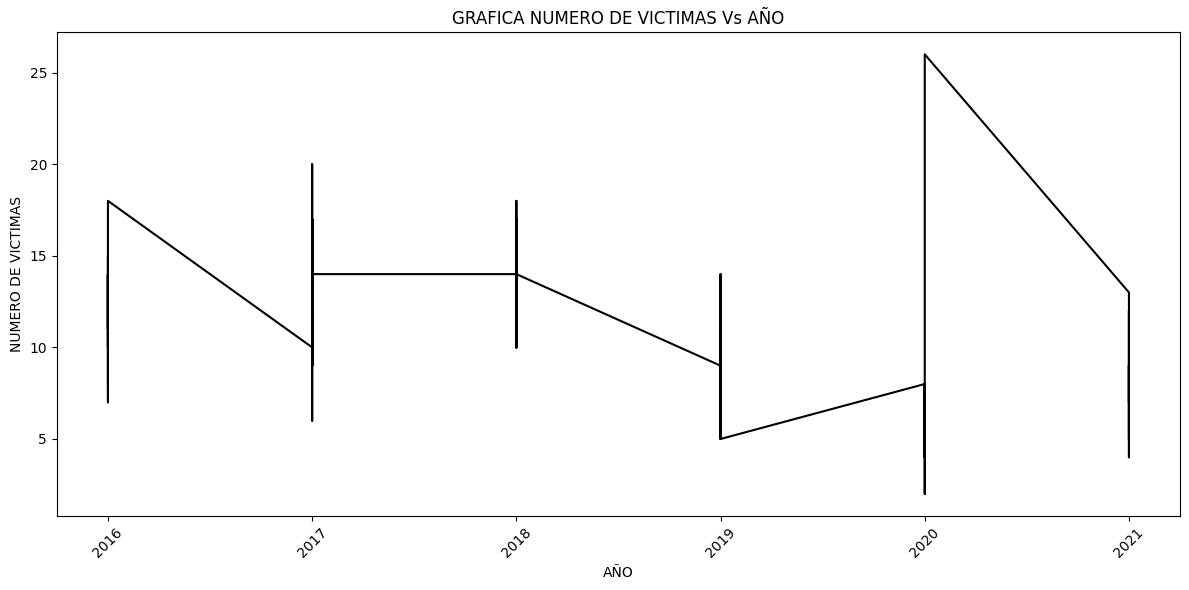

In [39]:
# Se realiza la gráfica correspondiente para el número de victimas por año, usando plot:
plt.figure(figsize=(12, 6))
plt.plot(vic["AÑO"], vic["NUM VICTIMAS"], color='black')
plt.title('GRAFICA NUMERO DE VICTIMAS Vs AÑO')
plt.xlabel('AÑO')
plt.ylabel('NUMERO DE VICTIMAS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

RELACION ENTRE NUMERO DE VICTIMAS Y SEXO - EDAD

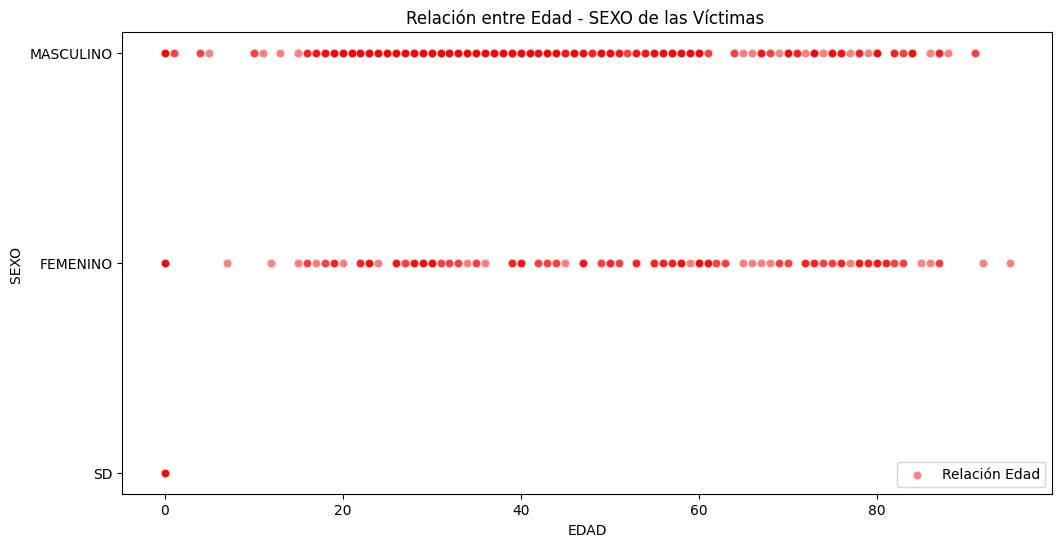

In [48]:
data = df.groupby(['EDAD', "SEXO"])['NUM VICTIMAS'].sum().reset_index()


# gráfico de dispersión para la relación entre edad y sexo
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='EDAD', y='SEXO', alpha=0.5, color='red', label='Relación Edad') 
plt.xlabel('EDAD')
plt.ylabel('SEXO ')
plt.title('Relación entre Edad - SEXO de las Víctimas ')
plt.show()

según la grafica anterior, se deduce que las victimas se identifican con el sexo masculino, quiene oscilan entre una edad de 20 a 60 años.Se miran algunos outlier que se deben a casos esporádicos de menores de edad y tercer edad en este tipo de accidentes.

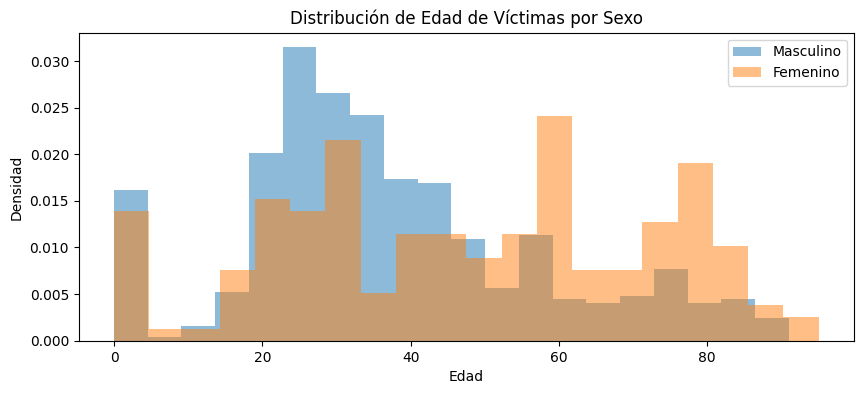

In [57]:
# Filtr0 sexo masculino
masculino = df[df['SEXO'] == 'MASCULINO']['EDAD'].dropna()

# Filtro  sexo femenino
femenino = df[df['SEXO'] == 'FEMENINO']['EDAD'].dropna()

# histograma
plt.figure(figsize=(10, 4))
plt.hist(masculino, bins=20, alpha=0.5, label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

otra forma de representar la relación entre edad y sexo en las victimas fatales de siniestros viales.lideradno el masculino en edades de 20 a 40 años. en sexo femenino, lidera las edades de 30 y 60 años individuales, deduciendo que ameitan mayor atención este tipo de personas en la campañas viales de prevencion de accidentes.

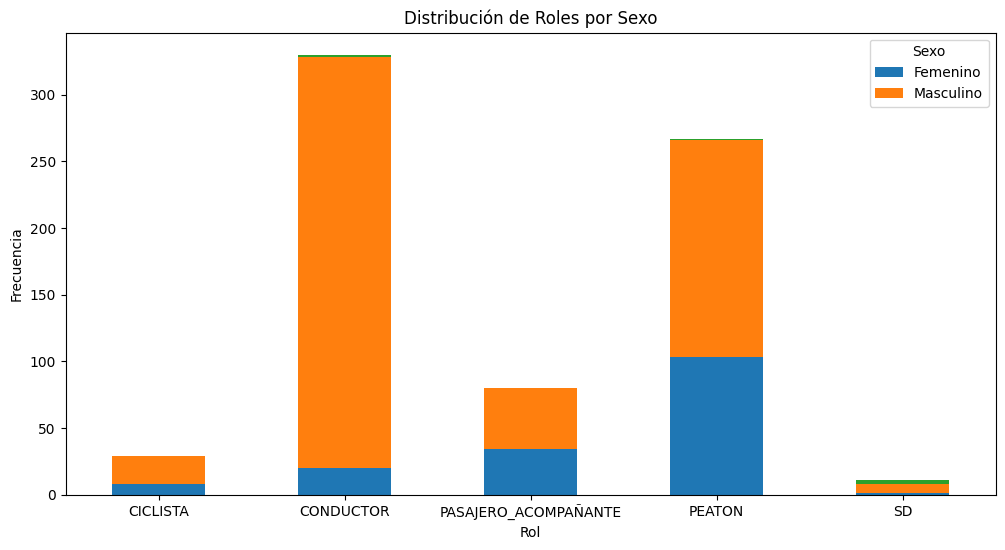

In [67]:
# grafica de rol por sexo
tabla_contingencia = pd.crosstab(df['ROL'], df['SEXO'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

Se confirma que el sexo masculino lidera el numero de victimas en accidetnes fatales en el rol de conductor y peaton. en cuanto al sexo femenino, tiene mayor indice de muertes por peaton que por conductor. esto es un estandar en latinoamerica donde el hombre es destinado a ser conductorm mientas que la mujer prefiere usar otro tipo de transporte que ser conductora de autos.

Grafica de relación de tipo calle por edad y sexo:

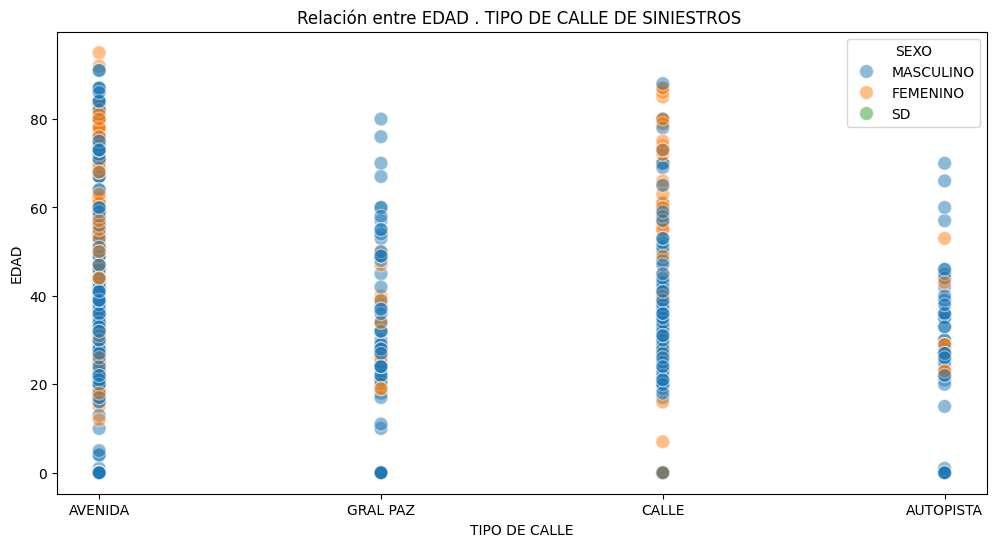

In [54]:
data = df.groupby(['TIPO CALLE', 'EDAD', 'SEXO'])['NUM VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TIPO CALLE', y='EDAD', hue='SEXO', alpha=0.5, s=100)
plt.xlabel('TIPO DE CALLE')
plt.ylabel('EDAD')
plt.title('Relación entre EDAD . TIPO DE CALLE DE SINIESTROS ')
plt.show()

la anterior grafica indica que en Avenida ocurren la mayor parte de accidentes con victimas ftales, donde la persona con más edad es de sexo femenino. En autopista no se observa personas victimas con edad mayor a 60 años. En General Paz, se observa que sexo masculino tiene la mayoría de accidentes viales.

GRAFICA DE TIPO DE CALLE POR ROL Y SEXO

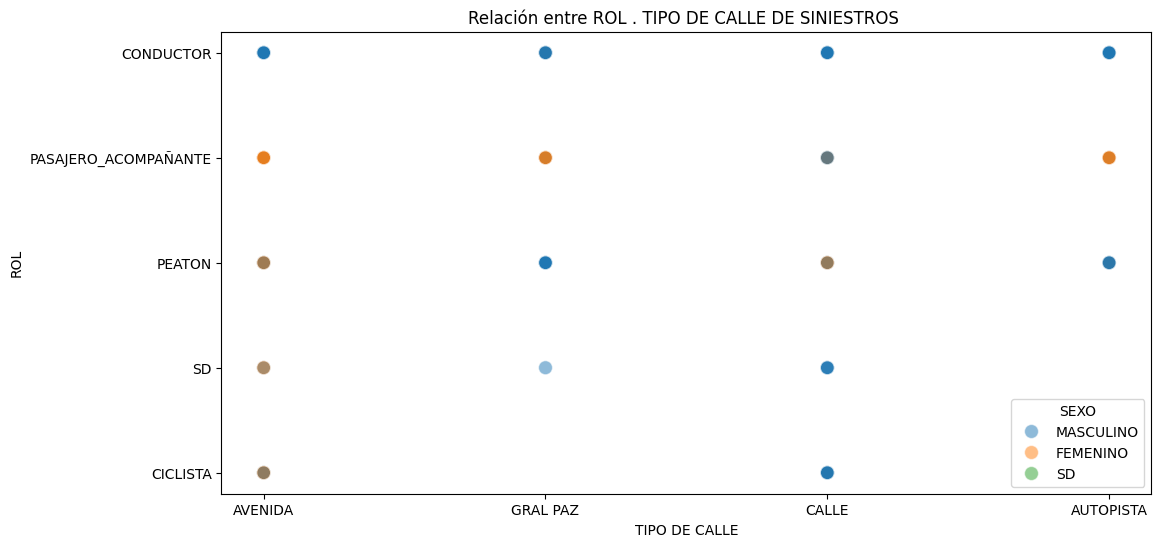

In [71]:
data = df.groupby(['TIPO CALLE', 'ROL', 'SEXO'])['NUM VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TIPO CALLE', y='ROL', hue='SEXO', alpha=0.5, s=100)
plt.xlabel('TIPO DE CALLE')
plt.ylabel('ROL')
plt.title('Relación entre ROL . TIPO DE CALLE DE SINIESTROS ')
plt.show()

Segun la grafica anterior, se observa que NO hubo accidentes de cicistas en la General Paz. El rol de peaton tiene más incidencia en las calles con intercepcioes, o semaforos como AVENIDA Y CALLE.

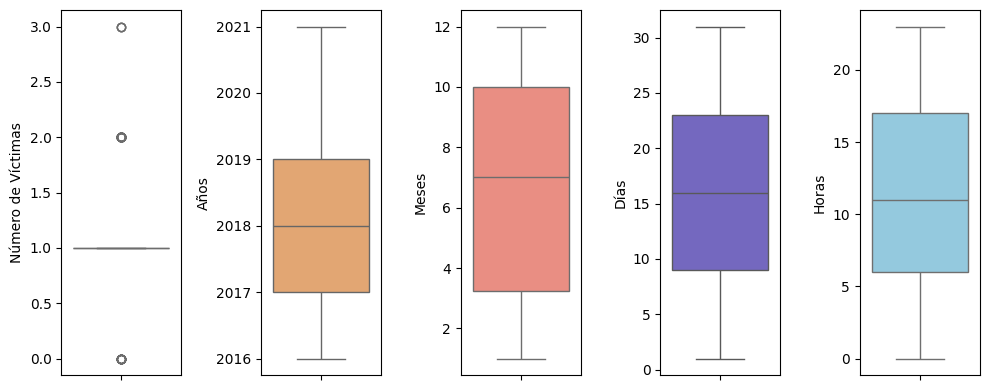

In [41]:

plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='NUM VICTIMAS', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='AÑO', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='MES', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='DIA', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='HORA', color = "#87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

El gráfico confirma que el promedio de mayor numero de victimas es el año 2018, mes julio, dia 16 y sobre las 10 horas aproximadamente.No se observan outliers, con excepto de numero de victimas donde exite un accidente con tres victimas en todo el dataset.